In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm
np.set_printoptions(suppress=True)

year = [i for i in range(2001,2018)] # 年份

In [4]:
# 输入数据文件名和表名
# 返回成分占比，特征向量，数据，列名
def Get_Data_of_PCA(sheet_file,sheet_name):
    # 获取数据
    df=pd.read_excel(sheet_file,sheet_name=sheet_name)
    data = df.values[:,1:]
    name = df.columns.values.tolist()[1:]
    # 数据主成分分析 
    pca = PCA()
    pca.fit(data)
    pca.transform(data)
    # 占比
    pca_pre = pca.explained_variance_ratio_
    # 特征向量
    pca_com = pca.components_

    # 展示内容
    print('每个成分各自方差百分比：',pca_pre)
    plt.title('Scree plot')
    plt.ylabel('Percent')
    plt.plot(pca_pre,'b-o')
    plt.show()
    
    return name,data,pca_pre,pca_com

In [5]:
# 输入数据和降维维度
# 返回降维数据
def Get_Dim_Data(data,num):
    # 降维数据
    pca = PCA(num)
    pca.fit(data)
    dim_low = pca.transform(data)
    for i in range(len(dim_low[0])):
        plt.plot(year,dim_low[:,i],'g-1')
    plt.show()
    return dim_low

In [6]:
# 输入x，y值以及方程最高次数
# 返回系数，模型信息以及拟合 Y 数值
def Get_Function(x,y,num):
    # 数组一维化
    x = x.flatten()
    y = y.flatten()
    
    X = x
    for i in range(1,num):
        X = np.column_stack((X,x**(i+1)))
    X = sm.add_constant(X)
    
    model = sm.OLS(y,X)
    result = model.fit()
    y_val = result.fittedvalues
    
    import warnings
    warnings.filterwarnings("ignore")
    print(result.summary())
    
    # 绘图
    line, = plt.plot(x, y, 'b''o')
    line_val, = plt.plot(x, y_val, 'r-1')
    plt.legend([line, line_val], ['ture data', 'fitting data'])
    plt.title('Data plot')
    plt.xlabel('economic')
    plt.ylabel('pollution')
    plt.show()
    
    return result.params,result.summary(),y_val



# --------------------------------- 经济数据 ---------------------------------



每个成分各自方差百分比： [0.99189355 0.00697562 0.00086643 0.00025537 0.0000089  0.00000013
 0.        ]


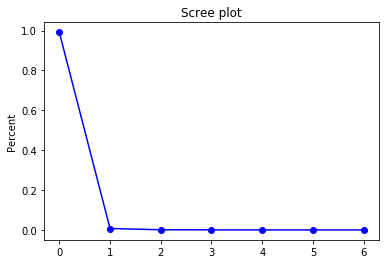

经济影响因素： ['人均GDP（元）', '农业总产值（万元）', '固定资产投资额（万元）', '社会消费品零售额（万元）', '工业总产值（万元）', '财政收入（万元）', '财政支出（万元）']


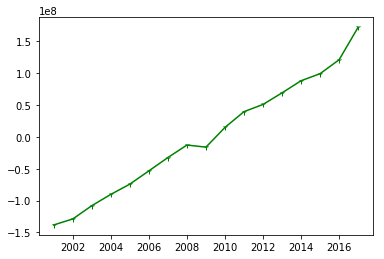

成分降维数据： [-138237766.90129527, -128862236.75893508, -108000431.74302219, -90276590.65629938, -74200562.85635796, -53401546.7547991, -32453696.82650668, -12878191.837340323, -16166757.969391804, 14800489.795069538, 39559299.870759286, 50841833.75815643, 69048504.77034931, 88065978.69668727, 99145631.30725043, 121013051.839107, 172002992.26656833]


In [7]:
# 经济数据列名，数据，各成分占比，特征向量
eco_name,eco_data,eco_pre,eco_com = Get_Data_of_PCA('深圳市数据.xls','economic_factor')
print('经济影响因素：',eco_name)

# 经济数据降维结果
eco_dim = Get_Dim_Data(eco_data,1)
print('成分降维数据：',eco_dim.flatten().tolist())



# --------------------------------- 污染数据 ---------------------------------



每个成分各自方差百分比： [0.99970807 0.00026174 0.00002398 0.00000364 0.00000257]


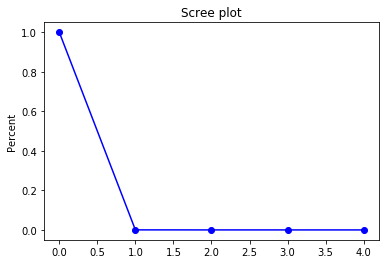

污染影响因素： ['二氧化硫日均量(ug/m3)', '二氧化氮日均量(ug/m3)', '可吸入颗粒物日均量(ug/m3)', '工业固体废物产生量（万吨）', '工业烟粉尘排放量（吨）']


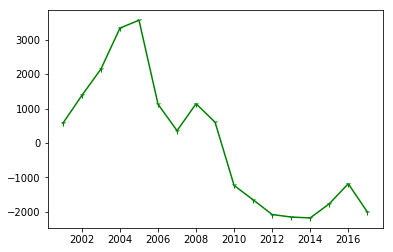

成分降维数据： [574.0738568570587, 1383.9577509631042, 2148.752916394255, 3337.4344802581018, 3564.2174308180274, 1124.8988579029508, 357.6027467791704, 1140.457816291799, 602.4145136651339, -1233.8895338697437, -1649.403457683107, -2076.01418094308, -2150.6156536374688, -2175.1507633806, -1765.5482460054816, -1183.5457791275244, -1999.642755282594]


In [8]:
# 污染数据列名，数据，各成分占比，特征向量
pol_name,pol_data,pol_pre,pol_com = Get_Data_of_PCA('深圳市数据.xls','pollution_factor')
print('污染影响因素：',pol_name)

# 污染数据降维结果
pol_dim = Get_Dim_Data(pol_data,1)
print('成分降维数据：',pol_dim.flatten().tolist())



# --------------------------------- 经济与环境组合数据展示 ---------------------------------



各年份环境与经济降维数据：



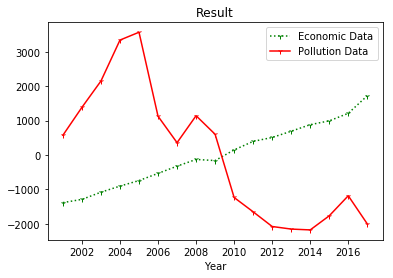

污染数据与经济数据相关图像：



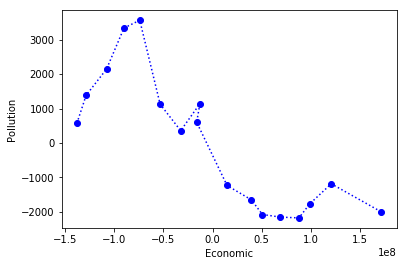

In [9]:
print('各年份环境与经济降维数据：\n')
plt.title('Result')
plt.plot(year,eco_dim[:,0]/(10**5),'g:1',label='Economic Data')
plt.plot(year,pol_dim[:,0],'r-1',label='Pollution Data')
plt.legend()
plt.xlabel('Year')
plt.show()

print('污染数据与经济数据相关图像：\n')
plt.plot(eco_dim[:,0], pol_dim[:,0], 'b:o')
plt.ylabel('Pollution')
plt.xlabel('Economic')
plt.show()

In [10]:
# 综合得分表
eco_score = eco_dim.flatten()
pol_score = pol_dim.flatten()

# 离差标准化主成分得分
eco_score = ((eco_dim - np.min(eco_dim))/(np.max(eco_dim)- np.min(eco_dim)))
pol_score = ((pol_dim - np.min(pol_dim))/(np.max(pol_dim)- np.min(pol_dim)))

total_score = pd.DataFrame(np.hstack((eco_score,pol_score)),columns=['economic score','pollution score'])


经济对环境拟合：

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     30.33
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           6.03e-05
Time:                        09:05:45   Log-Likelihood:                 6.4017
No. Observations:                  17   AIC:                            -8.803
Df Residuals:                      15   BIC:                            -7.137
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7185      0.066     10.9

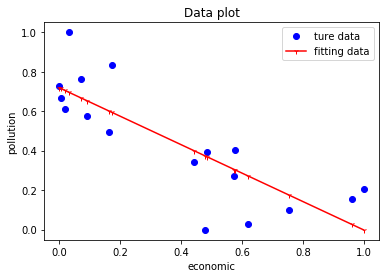

环境对经济拟合：

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     30.33
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           6.03e-05
Time:                        09:05:46   Log-Likelihood:                 4.2367
No. Observations:                  17   AIC:                            -4.473
Df Residuals:                      15   BIC:                            -2.807
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7930      0.090      8.85

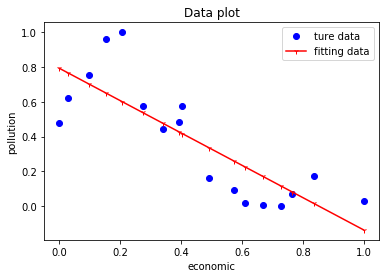

In [11]:
score = np.hstack((eco_score,pol_score))
num = 1
# 经济对环境拟合
fit_data = score[np.argsort(score[:,1]),:]
print('\n经济对环境拟合：\n')
_,_,_ = Get_Function(fit_data[:,1],fit_data[:,0],num)

# 环境对经济拟合
fit_data = score[np.argsort(score[:,0]),:]
print('环境对经济拟合：\n')
_,_,_ = Get_Function(fit_data[:,0],fit_data[:,1],num)
# 决定系数 R^2： 0.8320725753302713



# --------------------------------- EKC曲线数据拟合 ---------------------------------



二次多项式拟合
去除三年数据拟合:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     18.67
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           0.000291
Time:                        09:05:46   Log-Likelihood:                 6.0597
No. Observations:                  14   AIC:                            -6.119
Df Residuals:                      11   BIC:                            -4.202
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6846      0.116 

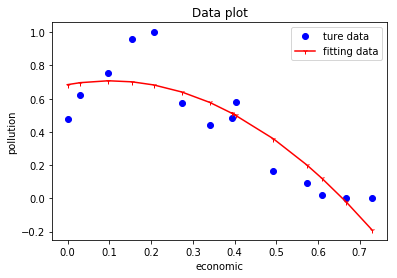

In [12]:
print('二次多项式拟合')
#print('全数据拟合:\n')
#coe,summary,y_val = Get_Function(eco_score,pol_score,2)
print('去除三年数据拟合:\n')
coe,summary,y_val = Get_Function(eco_score[:-3],pol_score[:-3],2)

三次多项式拟合
去除三年数据拟合:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     38.40
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           8.51e-06
Time:                        09:25:31   Log-Likelihood:                 13.389
No. Observations:                  14   AIC:                            -18.78
Df Residuals:                      10   BIC:                            -16.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4977      0.084 

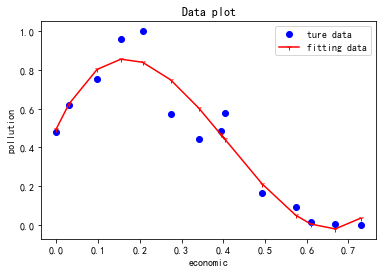

In [60]:
print('三次多项式拟合')
print('去除三年数据拟合:\n')
coe,summary,y_val = Get_Function(eco_score[:-3],pol_score[:-3],3)

In [94]:
def fun(x,coe):
    y = coe[0]
    x_s = x
    for i in coe[1:]:
        y=y+i*x_s
        x_s=x_s*x
    return y

In [95]:
y_list =list(y_val)
for i in eco.flatten():
    y_list.append(fun(i,coe))
y_list = np.array(y_list)

In [106]:
y_list

array([0.11414088, 0.22864655, 0.35984181])

In [108]:
y

array([0.07136718, 0.1727725 , 0.03057967])

In [119]:
error = []
for i in range(3):
    tmp = abs((y_list[i]-y[i])/y_list[i])
    print(tmp)
    error.append(tmp)
mean_error = np.mean(error)

0.3747448183199157
0.24436866904963078
0.9150191183308282


In [120]:
mean_error

0.5113775352334583

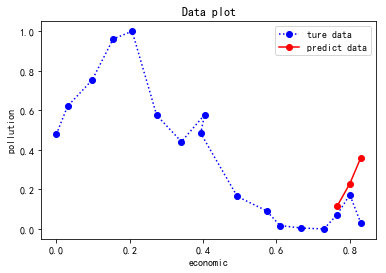

In [109]:
line, = plt.plot(eco_score, pol_score, 'b:o')
line_val, = plt.plot(eco_score[-3:], y_list[-3:], 'r-o')
plt.legend([line,line_val], ['ture data','predict data'])
plt.title('Data plot')
plt.xlabel('economic')
plt.ylabel('pollution')
plt.show()

In [115]:
arc_data = arc_data

array([[4137.47, 1526.9 ],
       [4467.16, 1668.25],
       [5567.66, 2228.44],
       [5856.65, 2155.82],
       [4841.55, 1488.86],
       [4512.66, 1184.  ],
       [4184.86,  905.56],
       [4619.53,  877.18],
       [5257.21,  712.58],
       [5178.84,  692.7 ],
       [5162.1 ,  962.1 ],
       [5259.5 ,  815.47],
       [6308.89,  895.76],
       [6249.7 ,  954.77],
       [7010.06,  818.86],
       [6677.5 ,  587.81]])

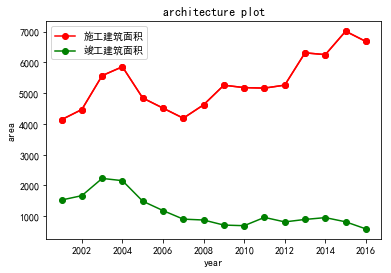

In [118]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

df=pd.read_excel('深圳市数据.xls','architecture')
arc_data = df.values[:,1:][:-1]
line1,=plt.plot(year[:-1],arc_data[:,0:1],'r-o')
line2,=plt.plot(year[:-1],arc_data[:,1:],'g-o')
plt.legend([line1, line2], [u'施工建筑面积',u'竣工建筑面积'])
plt.title('architecture plot')
plt.xlabel('year')
plt.ylabel('area')
plt.show()